In [1]:
from google.colab import drive
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
data = "/content/drive/MyDrive/369Project/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(data)
df.head()

Mounted at /content/drive


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
na_counts = df.isnull().sum()
na_counts[na_counts > 0]



,0


In [4]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
print(df.columns)


Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
df.to_csv('/content/drive/MyDrive/369Project/cleaned_diabetes_data.csv', index=False)
#files.download('/content/drive/MyDrive/369Project/cleaned_diabetes_data.csv')

In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

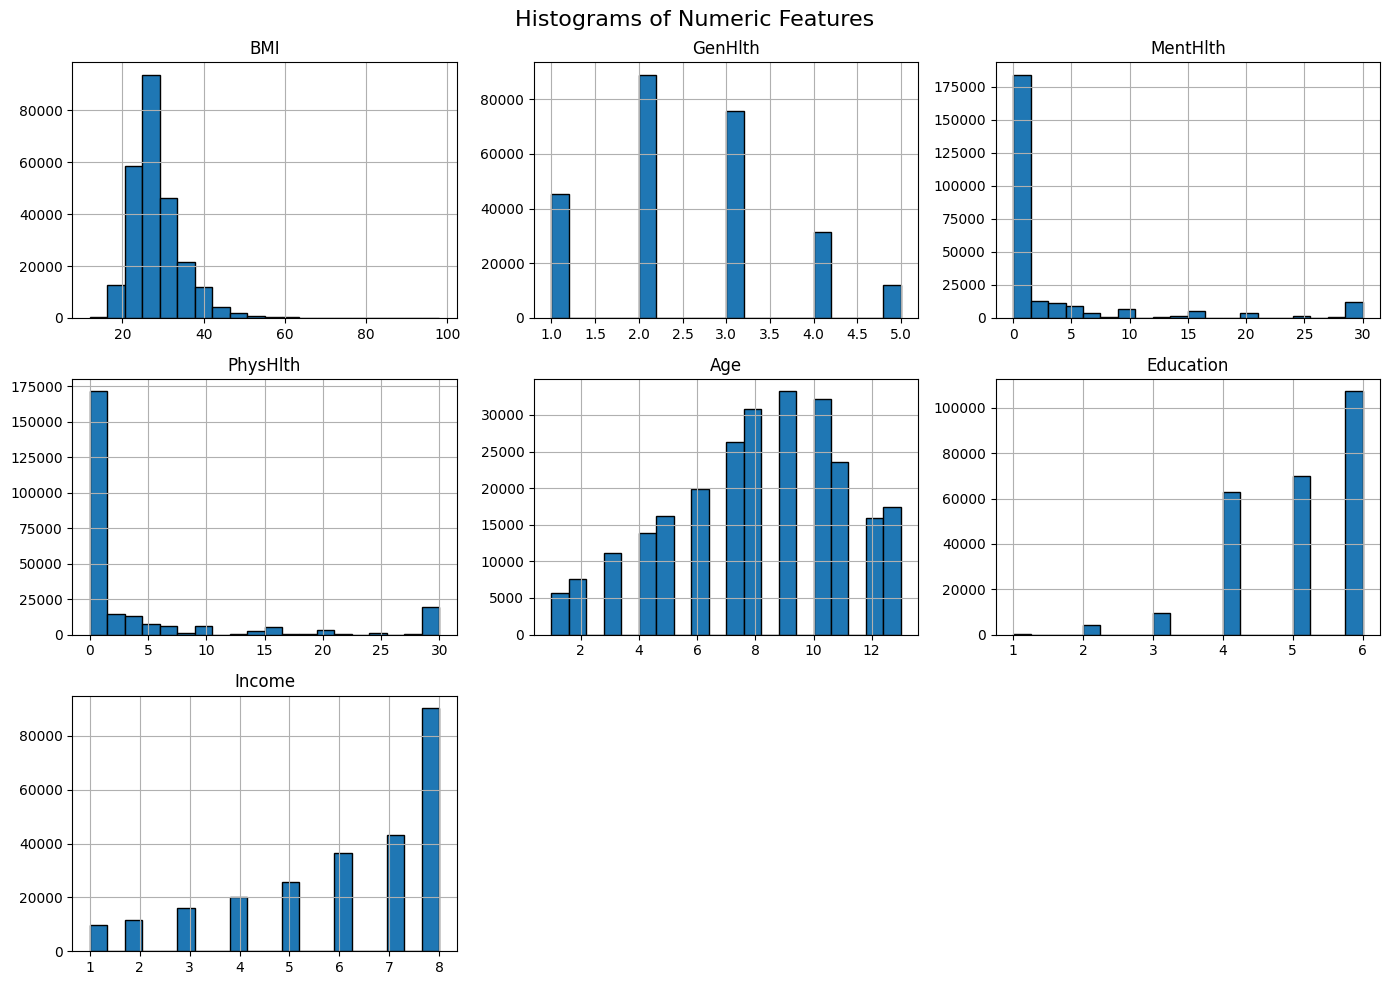

In [ ]:
numeric_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df[numeric_features].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

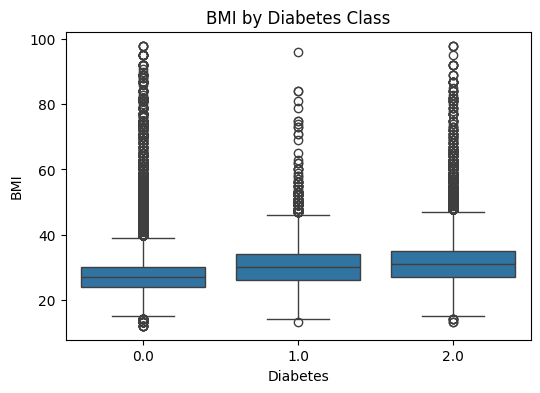

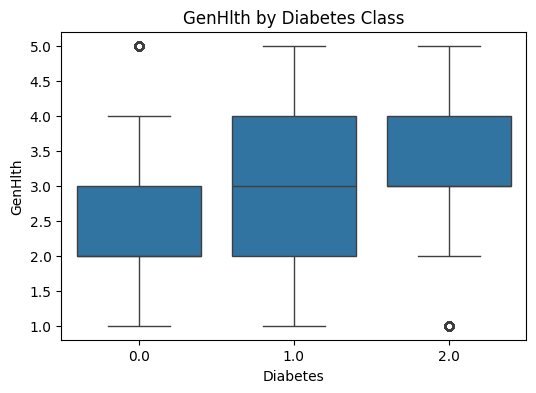

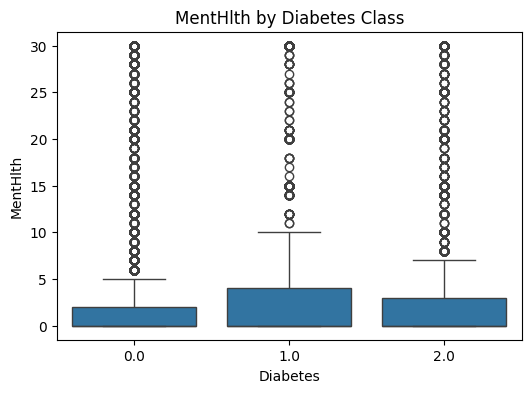

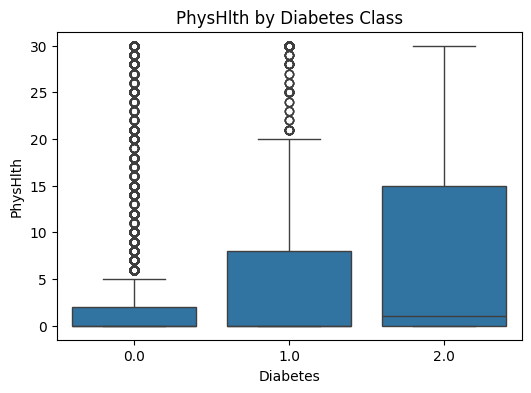

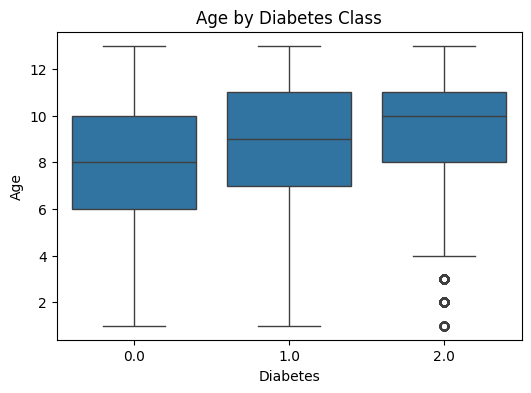

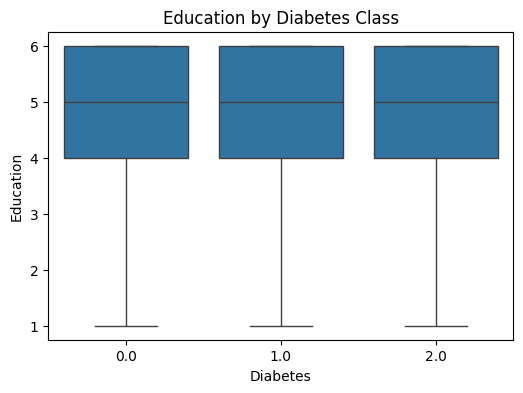

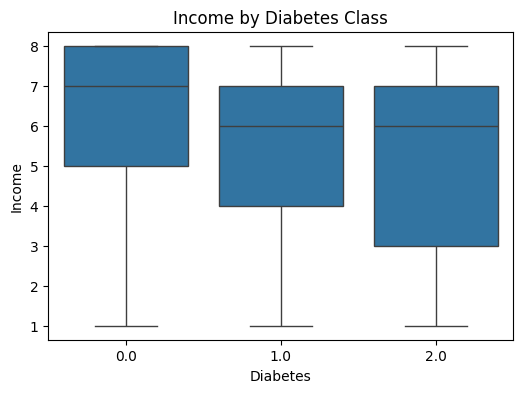

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Diabetes', y=col, data=df)
    plt.title(f'{col} by Diabetes Class')
    plt.show()


In [8]:
summary = df.groupby('Diabetes_012').agg({
    'Smoker': 'mean',
    'Fruits': 'mean',
    'PhysActivity': 'mean',
    'HighChol': 'mean',
    'HighBP': 'mean',
    'Sex': 'mean',
    'AnyHealthcare': 'mean'
}) * 100

summary = summary.rename(columns={
    'Smoker': 'Smoker (%)',
    'Fruits': 'Eats Fruits (%)',
    'PhysActivity': 'Physically Active (%)',
    'HighChol': 'High Cholesterol (%)',
    'HighBP': 'High Blood Pressure (%)',
    'Sex': 'Male (%)',
    'AnyHealthcare': 'Has Healthcare (%)'
})

summary = summary.round(1)
summary


,Smoker (%),Eats Fruits (%),Physically Active (%),High Cholesterol (%),High Blood Pressure (%),Male (%),Has Healthcare (%)
Diabetes_012,,,,,,,
0.0,43.0,64.3,77.9,37.9,37.1,43.4,95.0
1.0,49.3,60.2,67.8,62.1,62.9,43.8,94.5
2.0,51.8,58.5,63.1,67.0,75.3,47.9,96.0


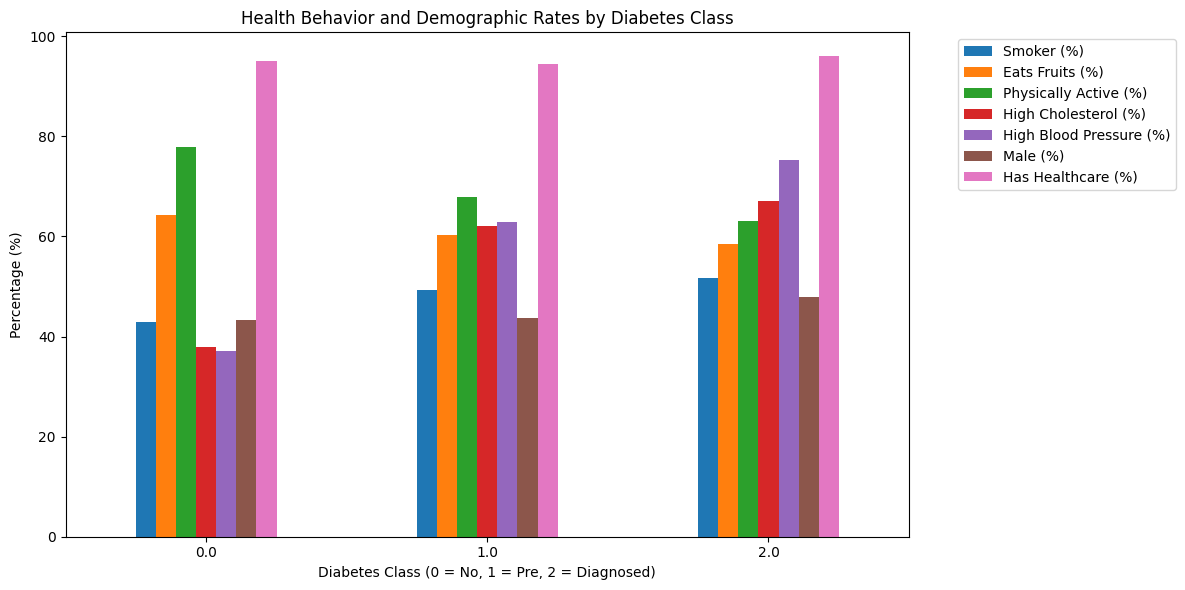

In [9]:
summary.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Health Behavior and Demographic Rates by Diabetes Class")
plt.ylabel("Percentage (%)")
plt.xlabel("Diabetes Class (0 = No, 1 = Pre, 2 = Diagnosed)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',


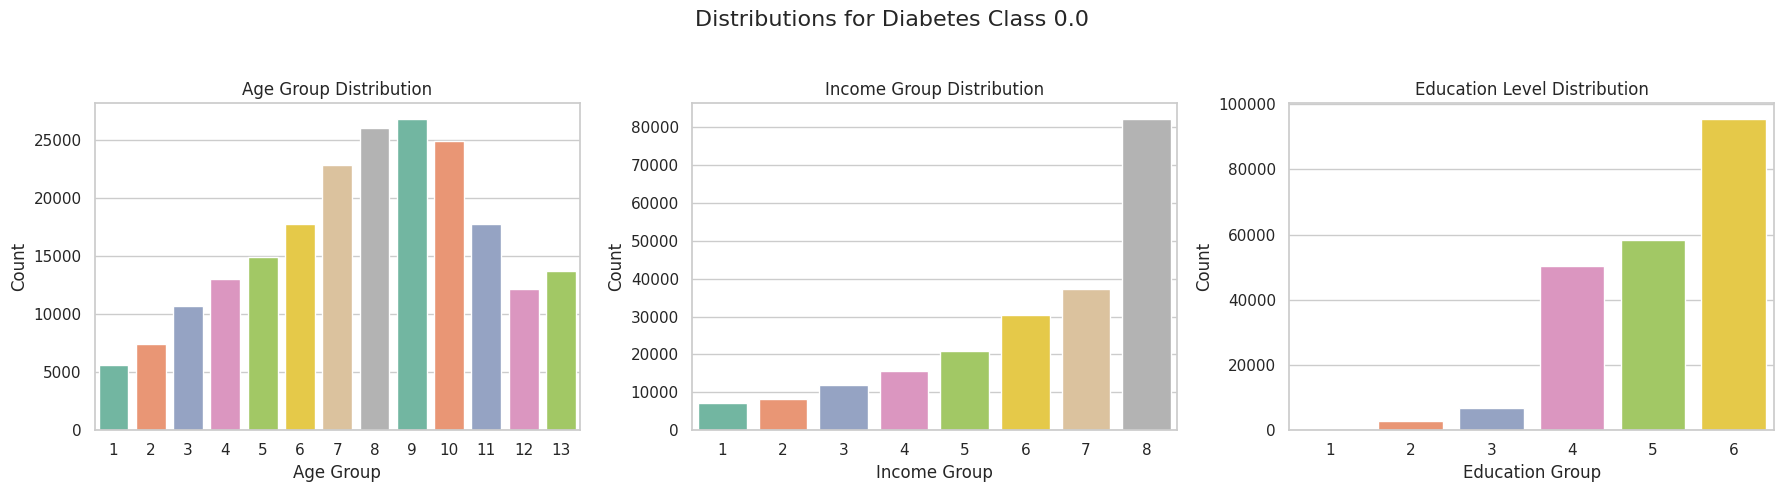

<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',


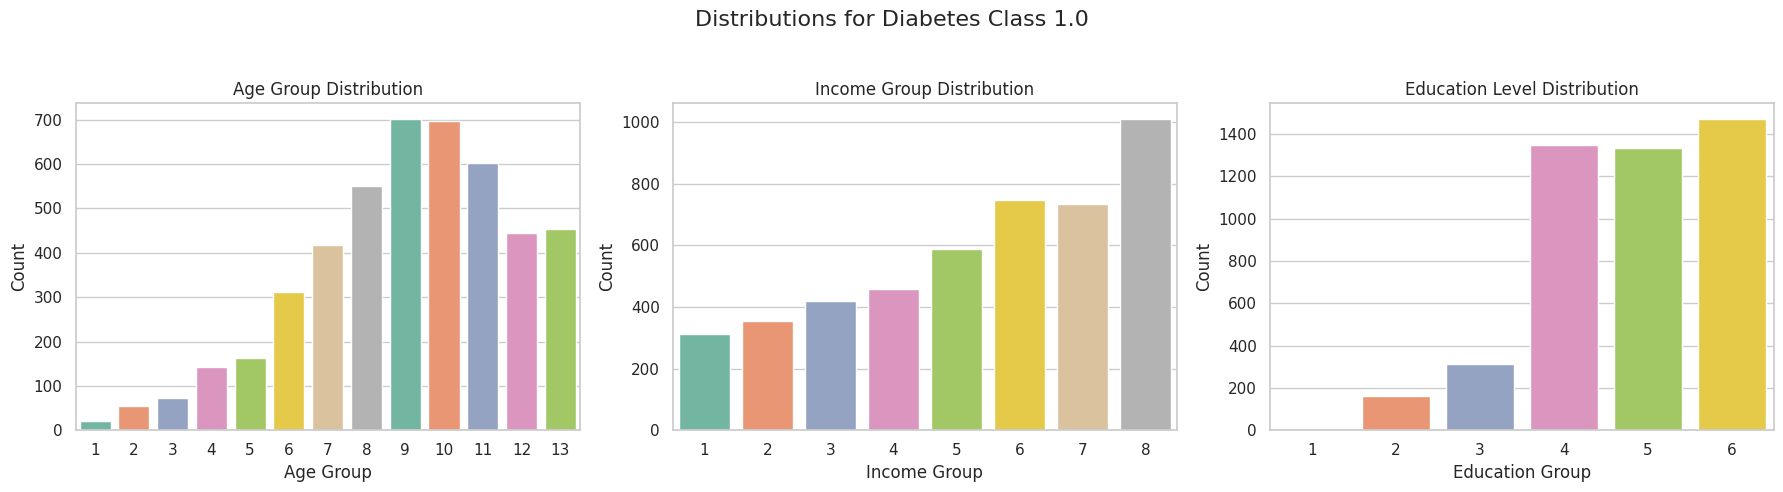

<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
<ipython-input-14-16ac1ef2726a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',


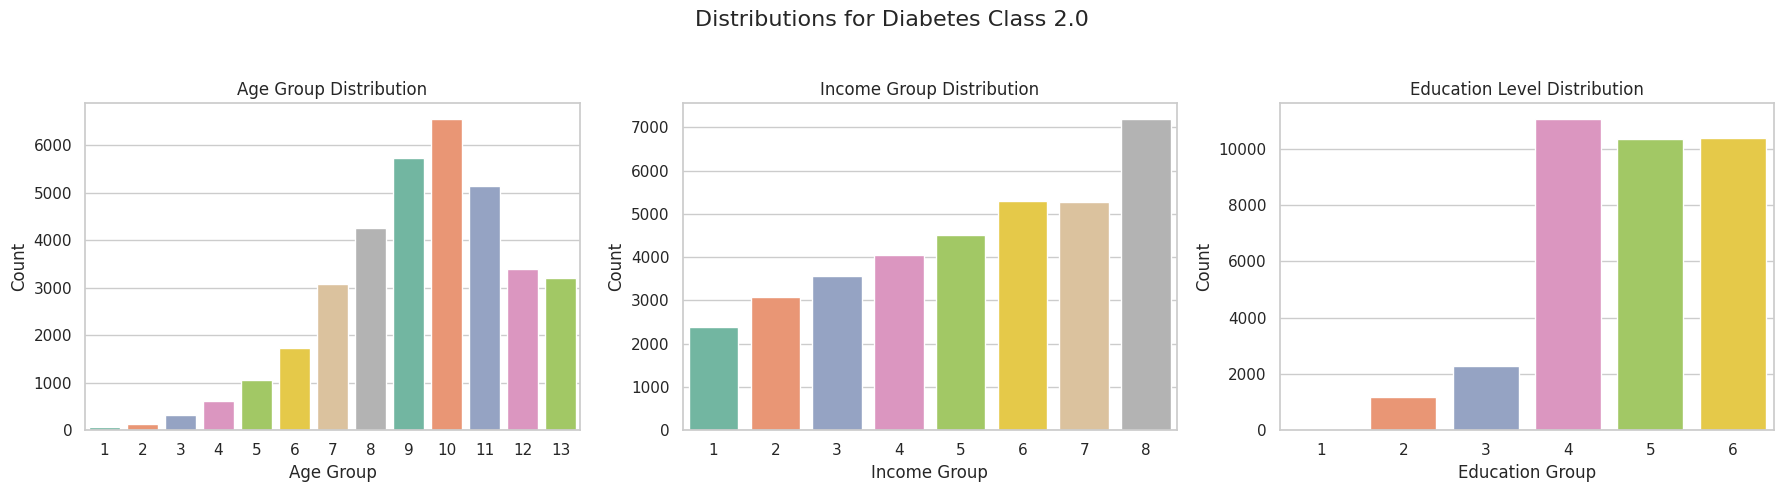

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df['Age'] = df['Age'].astype(int)
df['Income'] = df['Income'].astype(int)
df['Education'] = df['Education'].astype(int)


features = ['Age', 'Income', 'Education']
titles = {
    'Age': 'Age Group Distribution',
    'Income': 'Income Group Distribution',
    'Education': 'Education Level Distribution'
}

for diabetes_class in sorted(df['Diabetes_012'].unique()):
    subset = df[df['Diabetes_012'] == diabetes_class]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distributions for Diabetes Class {diabetes_class}', fontsize=16)

    for i, feature in enumerate(features):
        sns.countplot(ax=axs[i], data=subset, x=feature, palette='Set2',
                      order=sorted(subset[feature].unique()))
        axs[i].set_title(titles[feature])
        axs[i].set_xlabel(f'{feature} Group')
        axs[i].set_ylabel('Count')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



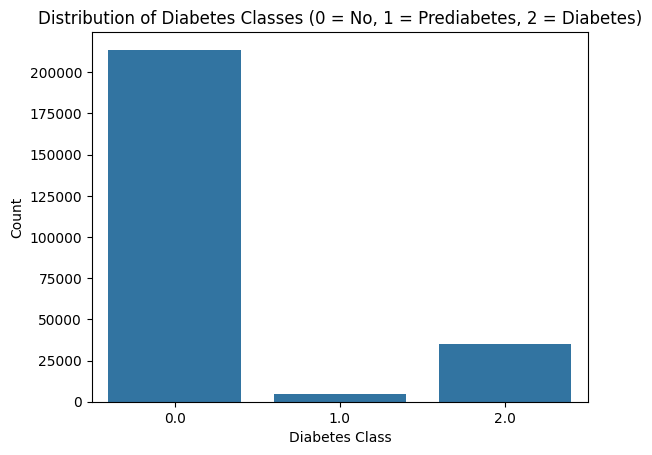

In [ ]:
sns.countplot(x='Diabetes', data=df)
plt.title("Distribution of Diabetes Classes (0 = No, 1 = Prediabetes, 2 = Diabetes)")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.show()


In [ ]:
class_counts = df['Diabetes'].value_counts().sort_index()
#print(class_counts)

for cls, count in class_counts.items():
    print(f"Class {cls}: {count} samples")


Class 0.0: 213703 samples
Class 1.0: 4631 samples
Class 2.0: 35346 samples


In [ ]:
from sklearn.utils import resample

df_majority = df[df['Diabetes'] == 0]
df_minority_1 = df[df['Diabetes'] == 1]
df_minority_2 = df[df['Diabetes'] == 2]

df_minority_1_upsampled = resample(df_minority_1,
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),
                                   random_state=42)

df_minority_2_upsampled = resample(df_minority_2,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

df_balanced = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
class_counts_balanced = df_balanced['Diabetes'].value_counts().sort_index()

print("Balanced class distribution:")
for cls, count in class_counts_balanced.items():
    print(f"Class {cls}: {count} samples")


Balanced class distribution:
Class 0.0: 213703 samples
Class 1.0: 213703 samples
Class 2.0: 213703 samples


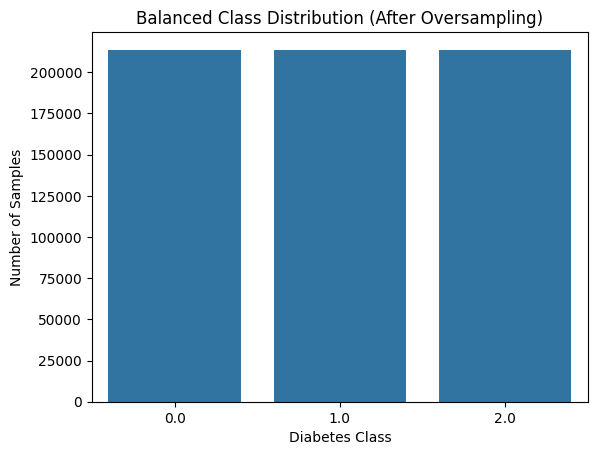

In [ ]:
sns.barplot(x=class_counts_balanced.index, y=class_counts_balanced.values)
plt.title("Balanced Class Distribution (After Oversampling)")
plt.xlabel("Diabetes Class")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# balanced dataset saved as csv
df_balanced.to_csv('/content/drive/MyDrive/369Project/balanced_diabetes_data.csv', index=False)


####

#### Rank feature importances before model building in Scala

In [ ]:
df_balanced.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
1,1.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,4.0
2,1.0,1.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,30.0,1.0,1.0,13.0,4.0,8.0
3,1.0,1.0,1.0,1.0,42.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,4.0,30.0,14.0,1.0,0.0,8.0,5.0,3.0
4,1.0,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,3.0,2.0,1.0,0.0,8.0,5.0,3.0


Compute Mutual Information Scores

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df_balanced.drop('Diabetes', axis=1)
y = df_balanced['Diabetes']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

mi_df.head()

,Feature,MI Score
0,HighBP,0.097363
13,GenHlth,0.079182
1,HighChol,0.075112
11,AnyHealthcare,0.058034
7,PhysActivity,0.055136


In [ ]:
mi_df

,Feature,MI Score
0,HighBP,0.097363
13,GenHlth,0.079182
1,HighChol,0.075112
11,AnyHealthcare,0.058034
7,PhysActivity,0.055136
9,Veggies,0.047624
3,BMI,0.045777
8,Fruits,0.045095
2,CholCheck,0.044207
18,Age,0.039703


Feature Correlations with Target

In [ ]:
corr_with_target = df_balanced.corr()['Diabetes'].drop('Diabetes')

corr_with_target = corr_with_target.reindex(corr_with_target.abs().sort_values(ascending=False).index)

print("Feature Correlation with Diabetes:")
print(corr_with_target)

Feature Correlation with Diabetes:
GenHlth                 0.344463
HighBP                  0.315226
BMI                     0.241091
HighChol                0.238775
Age                     0.232297
DiffWalk                0.220731
Income                 -0.186904
PhysHlth                0.176173
HeartDiseaseorAttack    0.173619
Education              -0.140640
PhysActivity           -0.131227
CholCheck               0.103332
Stroke                  0.103131
HvyAlcoholConsump      -0.077029
MentHlth                0.072543
Smoker                  0.072418
Veggies                -0.064510
Fruits                 -0.048347
Sex                     0.037493
NoDocbcCost             0.035569
AnyHealthcare           0.019719
Name: Diabetes, dtype: float64


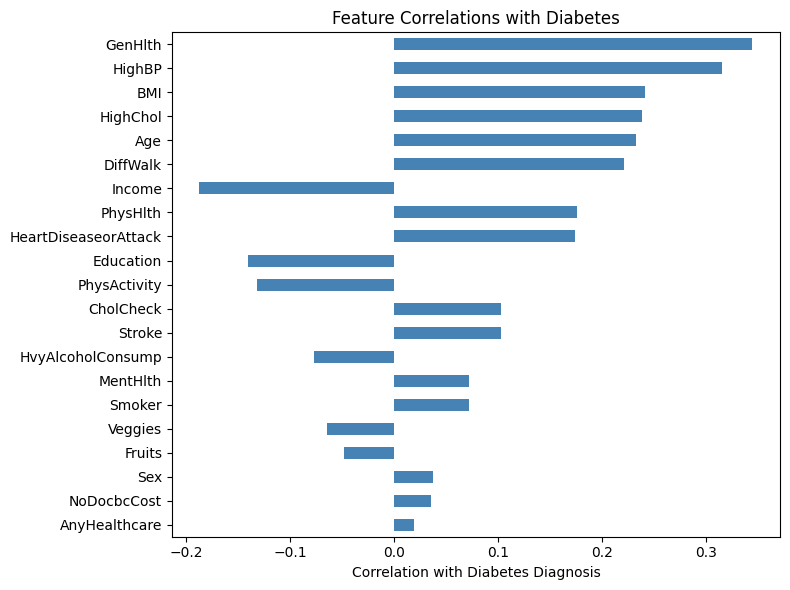

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
corr_with_target.plot(kind='barh', color='steelblue')
plt.xlabel("Correlation with Diabetes Diagnosis")
plt.title("Feature Correlations with Diabetes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Correlation Matrix

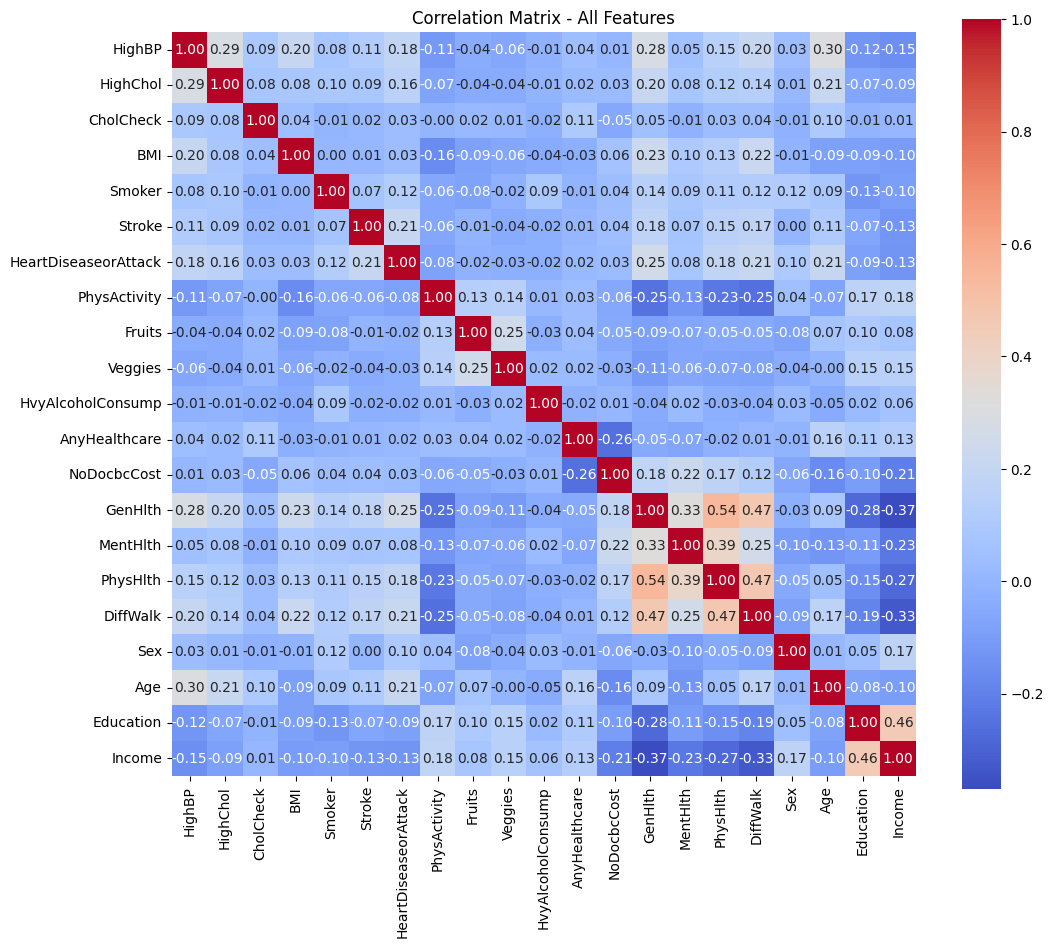

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
diabetes_matrix = X.corr()

# Only show features above correlation threshold of +- 0.25
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix - All Features")
plt.show()